# NMR Physics Visualization Notebook

This notebook presents several key equations and concepts from Nuclear Magnetic Resonance (NMR) physics. We will walk through topics including:

- **Nuclear Magnetic Resonance** – an introduction to the phenomenon
- **Inside the MRI Scanner** – a text description of the components based on NMR principles (to be extended later for MRI)
- **The Proton, Spin, and Precession** – visualizing the precession of a nuclear spin
- **Signal Detection and the Larmor Equation** – plotting a cosine signal with frequency given by the Larmor equation
- **Flip Angle** – how the RF pulse rotates the magnetization
- **Ensemble Magnetic Moment** – calculating the net magnetization
- **Free Induction Decay and T₂** – simulating an FID signal with exponential decay
- **Weighting and TE** – illustrating T₂ weighting via echo time
- **Spin Density Imaging** – a simulated 2D spin density map
- **T₁ Relaxation** – plotting the recovery of longitudinal magnetization
- **T₁ Weighting and TR** – showing the effect of repetition time on signal intensity
- **The NMR Experiment and the Rotating Frame** – understanding the concept of the rotating frame
- **Excitation: the B₁ Field** – calculating the flip angle from an RF pulse
- **Measuring Longitudinal Magnetization (Inversion Recovery)** – a simulation of an inversion recovery experiment
- **The MR Contrast Equation** – combining T₁ and T₂ effects
- **Magnetization and Polarization** – computing the thermal polarization of nuclei

Later on, similar ideas can be extended to MRI physics. Enjoy exploring the physics of NMR!

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set a style for plots
plt.style.use('ggplot')

## 1. Introduction to NMR

Nuclear Magnetic Resonance (NMR) is based on the interaction of nuclear spins with a static magnetic field. Nuclei with nonzero spin (such as the proton, ^1H) behave like tiny magnets. When these nuclei are placed in a strong magnetic field (**B₀**), they precess at a characteristic frequency (the **Larmor frequency**), given by:

![Larmor Equation](https://latex.codecogs.com/svg.image?\omega_0=\gamma&space;B_0)

An RF pulse (B₁) can tip the net magnetization away from the B₀ direction, and the system then relaxes back to equilibrium. The relaxation processes are characterized by the time constants T₁ (spin-lattice or longitudinal) and T₂ (spin-spin or transverse).

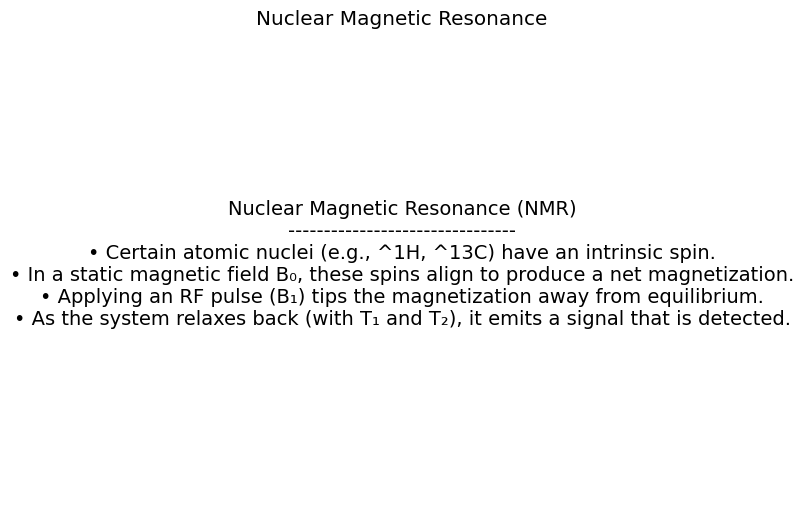

In [5]:
def nmr_intro():
    """Display an introductory text for NMR."""
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')
    text = (
        "Nuclear Magnetic Resonance (NMR)\n"
        "--------------------------------\n"
        "• Certain atomic nuclei (e.g., ^1H, ^13C) have an intrinsic spin.\n"
        "• In a static magnetic field B₀, these spins align to produce a net magnetization.\n"
        "• Applying an RF pulse (B₁) tips the magnetization away from equilibrium.\n"
        "• As the system relaxes back (with T₁ and T₂), it emits a signal that is detected."
    )
    ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=14)
    plt.title("Nuclear Magnetic Resonance")
    plt.show()

nmr_intro()

## 2. Inside the MRI Scanner

Although we are focusing on NMR, note that these principles underlie MRI as well. Inside an MRI scanner:

- A superconducting magnet generates a homogeneous B₀ field.
- RF coils produce the B₁ field to excite the nuclei.
- Gradient coils are used for spatial encoding.

Below is a simple text visualization.

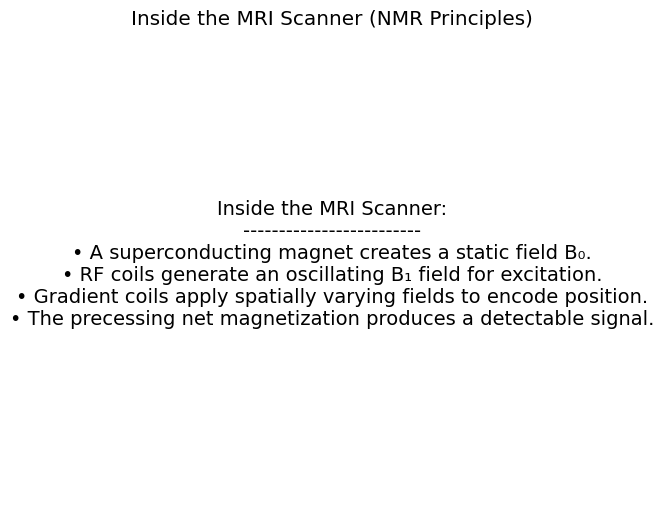

In [6]:
def inside_mri_scanner():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')
    text = (
        "Inside the MRI Scanner:\n"
        "-------------------------\n"
        "• A superconducting magnet creates a static field B₀.\n"
        "• RF coils generate an oscillating B₁ field for excitation.\n"
        "• Gradient coils apply spatially varying fields to encode position.\n"
        "• The precessing net magnetization produces a detectable signal."
    )
    ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=14)
    plt.title("Inside the MRI Scanner (NMR Principles)")
    plt.show()

inside_mri_scanner()

## 3. The Proton, Spin, and Precession

A proton (¹H) with spin precesses about the static magnetic field B₀. Its precession is given by the Larmor equation:

![Larmor Equation](https://latex.codecogs.com/svg.image?\omega_0=\gamma&space;B_0)

The following plot illustrates a simple precession concept.

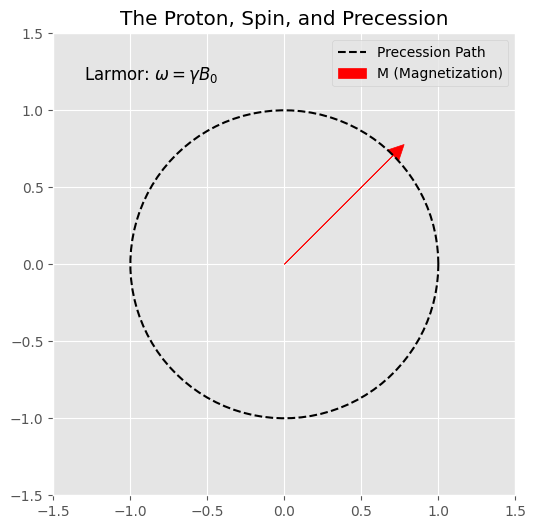

In [7]:
def proton_precession():
    fig, ax = plt.subplots(figsize=(6, 6))
    # Draw a dashed circle representing the precession path
    theta = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(theta), np.sin(theta), 'k--', label="Precession Path")
    
    # Draw an arrow for the magnetization vector (M)
    phi = np.pi/4  # Example: 45°
    ax.arrow(0, 0, np.cos(phi), np.sin(phi), head_width=0.1, head_length=0.1, fc='r', ec='r', label="M (Magnetization)")
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.text(-1.3, 1.2, r"Larmor: $\omega=\gamma B_0$", fontsize=12)
    plt.title("The Proton, Spin, and Precession")
    plt.legend()
    plt.show()

proton_precession()

## 4. Signal Detection and the Larmor Equation

The NMR signal (as a function of time) can be modeled as a cosine wave at the Larmor frequency. For a proton:

![Signal](https://latex.codecogs.com/svg.image?S(t)=A\cos(\omega_0t))

Below we plot an example signal using a field B₀ = 1.5 T.

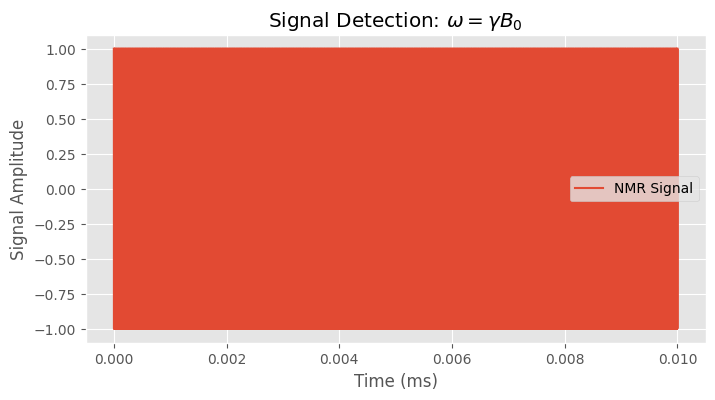

In [14]:
def signal_detection_larmor():
    t = np.linspace(0, 0.001, 100000)
    gamma = 2 * np.pi * 42.58e6  # rad/s/T for protons (42.58 MHz/T)
    B0 = 7  # Tesla
    omega = gamma * B0
    A = 1.0
    S = A * np.cos(omega * t)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t * 1e1, S, label="NMR Signal")
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Signal Amplitude")
    ax.set_title(r"Signal Detection: $\omega=\gamma B_0$")
    plt.legend()
    plt.show()

signal_detection_larmor()

## 5. Flip Angle

The flip angle (θ) describes how much the RF pulse tips the net magnetization. The transverse (xy) and longitudinal (z) components are:

![Flip Angle Equations](https://latex.codecogs.com/svg.image?M_{xy}=M_0\sin\theta,&space;\quad&M_z=M_0\cos\theta)

Below we plot these components as a function of the flip angle.

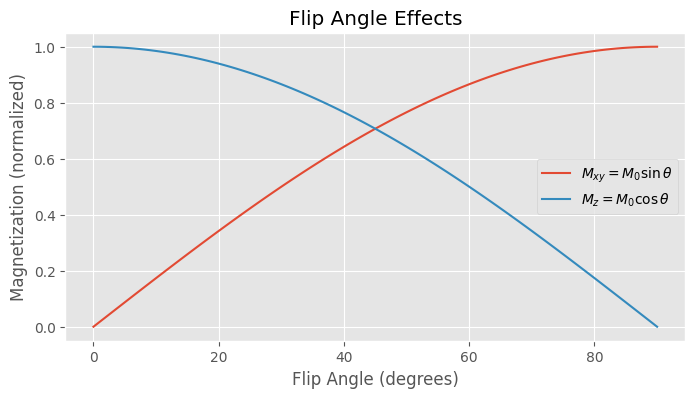

In [15]:
def flip_angle():
    theta_deg = np.linspace(0, 90, 100)
    theta = np.deg2rad(theta_deg)
    M0 = 1.0
    M_xy = M0 * np.sin(theta)
    M_z = M0 * np.cos(theta)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(theta_deg, M_xy, label=r'$M_{xy}=M_0\sin\theta$')
    ax.plot(theta_deg, M_z, label=r'$M_z=M_0\cos\theta$')
    ax.set_xlabel("Flip Angle (degrees)")
    ax.set_ylabel("Magnetization (normalized)")
    ax.set_title("Flip Angle Effects")
    plt.legend()
    plt.show()

flip_angle()

## 6. Ensemble Magnetic Moment

The net magnetization (M₀) of a sample is given by the number of nuclei (N) times the magnetic moment per nucleus (μ):

![Ensemble Magnetic Moment](https://latex.codecogs.com/svg.image?M_0=N\mu)

Below, we show a simple bar plot to represent this concept.

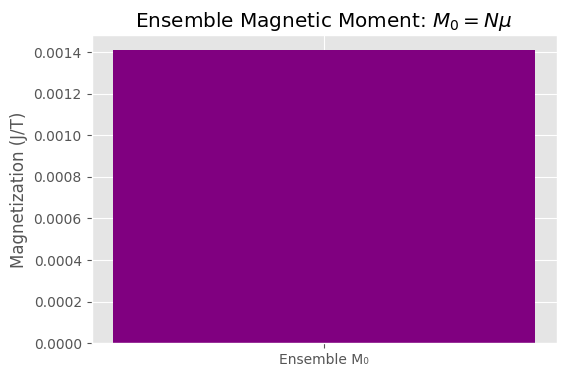

In [16]:
def ensemble_magnetic_moment():
    N = 1e23  # Number of nuclei (arbitrary large number)
    mu = 1.41e-26  # J/T, approximate magnetic moment of a proton
    M0 = N * mu
    
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(["Ensemble M₀"], [M0], color='purple')
    ax.set_ylabel("Magnetization (J/T)")
    ax.set_title(r"Ensemble Magnetic Moment: $M_0=N\mu$")
    plt.show()

ensemble_magnetic_moment()

## 7. Free Induction Decay (FID) and T₂

After an RF pulse, the transverse magnetization decays exponentially due to T₂ relaxation. The Free Induction Decay (FID) signal is given by:

![FID Equation](https://latex.codecogs.com/svg.image?S(t)=S_0e^{-t/T_2}\cos(\omega_0t))

Below we simulate an FID signal.

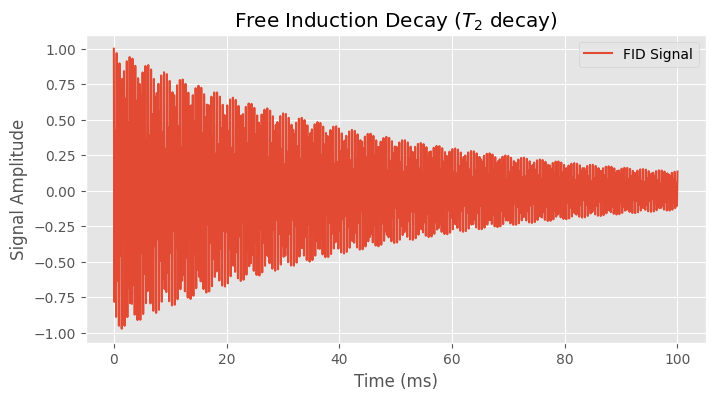

In [17]:
def free_induction_decay():
    t = np.linspace(0, 0.1, 1000)
    T2 = 0.05  # seconds
    gamma = 2 * np.pi * 42.58e6
    B0 = 1.5  # Tesla
    omega = gamma * B0
    S0 = 1.0
    S = S0 * np.exp(-t / T2) * np.cos(omega * t)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t * 1e3, S, label="FID Signal")
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Signal Amplitude")
    ax.set_title(r"Free Induction Decay ($T_2$ decay)")
    plt.legend()
    plt.show()

free_induction_decay()

## 8. Weighting and TE

T₂ weighting in an NMR (or MRI) experiment depends on the echo time (TE). The signal attenuation follows:

![TE Weighting](https://latex.codecogs.com/svg.image?S\propto&space;e^{-TE/T_2})

Below we plot the signal attenuation as a function of TE.

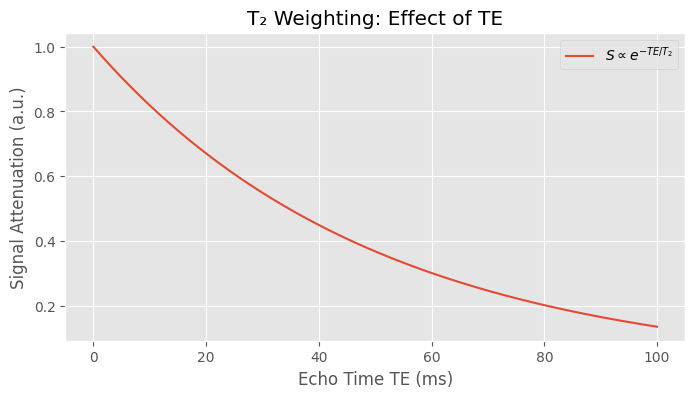

In [18]:
def weighting_and_TE():
    TE = np.linspace(0, 0.1, 1000)
    T2 = 0.05
    S = np.exp(-TE / T2)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(TE * 1e3, S, label=r'$S\propto e^{-TE/T_2}$')
    ax.set_xlabel("Echo Time TE (ms)")
    ax.set_ylabel("Signal Attenuation (a.u.)")
    ax.set_title("T₂ Weighting: Effect of TE")
    plt.legend()
    plt.show()

weighting_and_TE()

## 9. Spin Density Imaging

In spin density imaging the brightness of each pixel is proportional to the local spin density (ρ). Below is a simulation of a 2D spin density image created from overlapping Gaussian distributions.

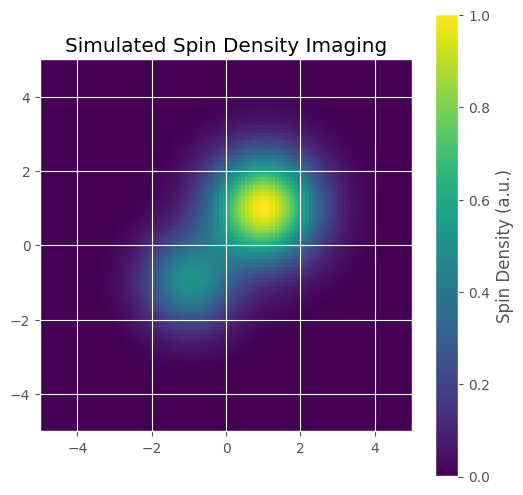

In [19]:
def spin_density_imaging():
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-((X - 1)**2 + (Y - 1)**2) / 2) + 0.5 * np.exp(-((X + 1)**2 + (Y + 1)**2) / 1.5)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    c = ax.imshow(Z, extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
    ax.set_title("Simulated Spin Density Imaging")
    fig.colorbar(c, ax=ax, label='Spin Density (a.u.)')
    plt.show()

spin_density_imaging()

## 10. T₁ Relaxation

T₁ relaxation describes the recovery of the longitudinal magnetization following an RF pulse. The recovery is given by:

![T1 Recovery](https://latex.codecogs.com/svg.image?M_z(t)=M_0(1-e^{-t/T_1}))

Below we plot the recovery curve for T₁ relaxation.

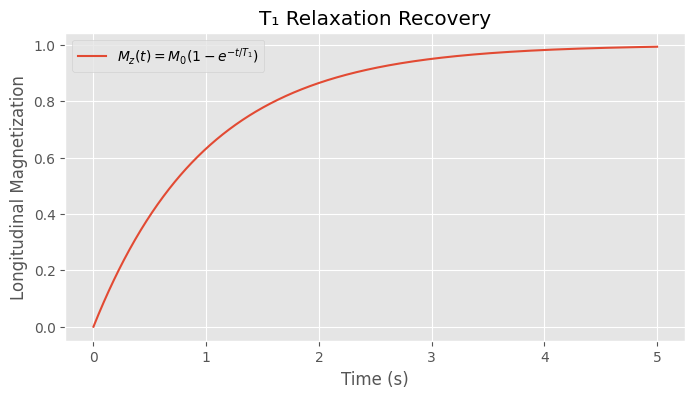

In [20]:
def t1_relaxation():
    t = np.linspace(0, 5, 1000)
    T1 = 1.0  # seconds
    M0 = 1.0
    Mz = M0 * (1 - np.exp(-t / T1))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t, Mz, label=r'$M_z(t)=M_0(1-e^{-t/T_1})$')
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Longitudinal Magnetization")
    ax.set_title("T₁ Relaxation Recovery")
    plt.legend()
    plt.show()

t1_relaxation()

## 11. T₁ Weighting and TR

For a given spin density ρ, the signal intensity depends on the repetition time (TR) as:

![T1 Weighting](https://latex.codecogs.com/svg.image?S\propto&space;\rho(1-e^{-TR/T_1}))

Below we plot the signal intensity as a function of TR.

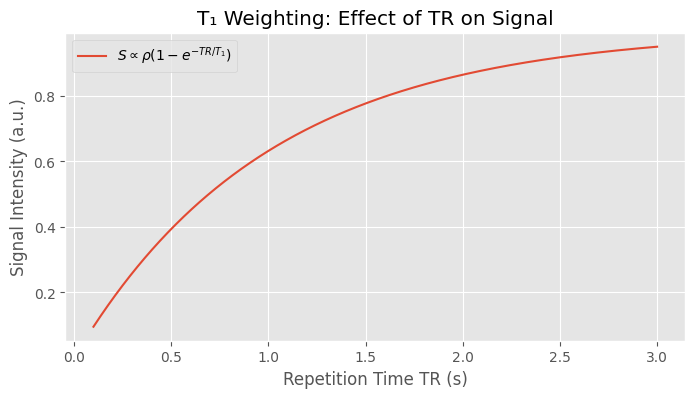

In [21]:
def t1_weighting_and_TR():
    TR = np.linspace(0.1, 3, 1000)
    T1 = 1.0
    rho = 1.0
    S = rho * (1 - np.exp(-TR / T1))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(TR, S, label=r'$S\propto\rho(1-e^{-TR/T_1})$')
    ax.set_xlabel("Repetition Time TR (s)")
    ax.set_ylabel("Signal Intensity (a.u.)")
    ax.set_title("T₁ Weighting: Effect of TR on Signal")
    plt.legend()
    plt.show()

t1_weighting_and_TR()

## 12. The NMR Experiment and the Rotating Frame

When we apply an RF pulse at the Larmor frequency, it is often useful to describe the dynamics in a frame rotating at the RF frequency. In the rotating frame, if the RF frequency matches the Larmor frequency, the effective field is zero, and the magnetization appears stationary (aside from relaxation effects).

Below we illustrate the concept by showing that in the rotating frame the effective frequency is zero.

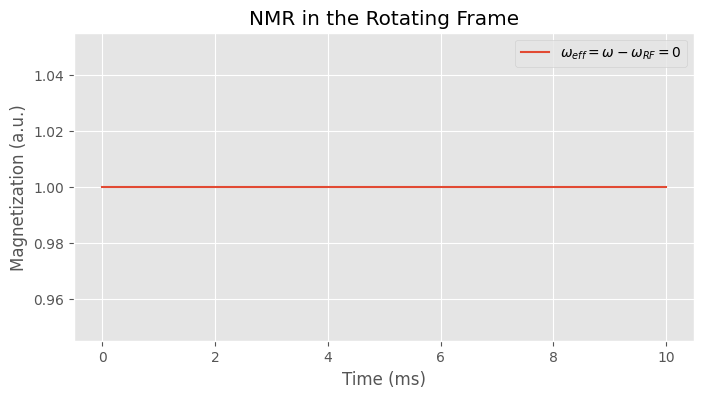

In [22]:
def rotating_frame():
    t = np.linspace(0, 0.01, 1000)
    gamma = 2 * np.pi * 42.58e6  
    B0 = 1.5  
    omega = gamma * B0
    omega_rf = omega  # On-resonance: RF frequency equals Larmor frequency
    omega_eff = omega - omega_rf  # Effective frequency is 0
    
    # We just plot a constant value to represent zero precession in the rotating frame
    S = np.ones_like(t)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t * 1e3, S, label=r'$\omega_{eff}=\omega-\omega_{RF}=0$')
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Magnetization (a.u.)")
    ax.set_title("NMR in the Rotating Frame")
    plt.legend()
    plt.show()

rotating_frame()

## 13. Excitation: The B₁ Field

The flip angle (θ) achieved by an RF pulse is given by:

![Flip Angle from B1](https://latex.codecogs.com/svg.image?\theta=\gamma&space;B_1\tau_p)

Below we calculate and display the flip angle for an example pulse.

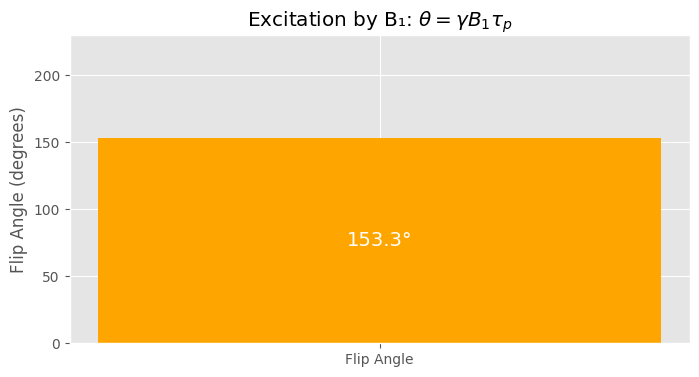

In [23]:
def b1_excitation():
    tp = 1e-4  # Pulse duration in seconds
    gamma = 2 * np.pi * 42.58e6  
    B1 = 1e-4  # Tesla (example value)
    flip_angle = gamma * B1 * tp  # in radians
    flip_angle_deg = np.rad2deg(flip_angle)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.bar(["Flip Angle"], [flip_angle_deg], color='orange')
    ax.set_ylabel("Flip Angle (degrees)")
    ax.set_title(r"Excitation by B₁: $\theta=\gamma B_1\tau_p$")
    ax.text(0, flip_angle_deg/2, f"{flip_angle_deg:.1f}°", ha='center', va='center', color='w', fontsize=14)
    plt.ylim(0, max(flip_angle_deg*1.5, 90))
    plt.show()

b1_excitation()

## 14. Measuring Longitudinal Magnetization (Inversion Recovery)

An inversion recovery experiment measures T₁ by inverting the magnetization and monitoring its recovery:

![Inversion Recovery](https://latex.codecogs.com/svg.image?M_z(t)=M_0(1-2e^{-t/T_1}))

Below is a plot simulating the inversion recovery curve.

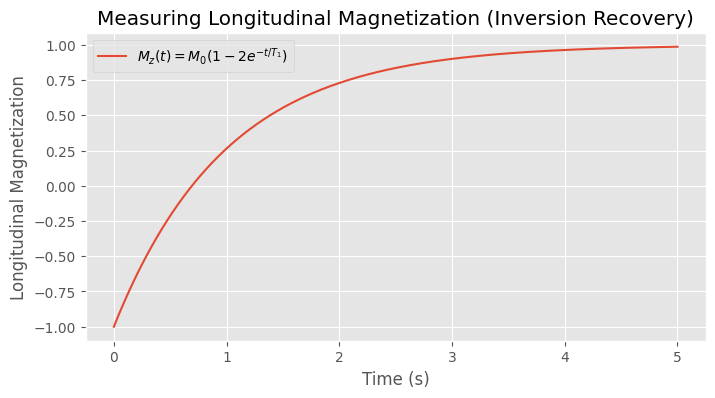

In [24]:
def measuring_longitudinal_magnetization():
    t = np.linspace(0, 5, 1000)
    T1 = 1.0
    M0 = 1.0
    Mz = M0 * (1 - 2 * np.exp(-t / T1))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t, Mz, label=r'$M_z(t)=M_0(1-2e^{-t/T_1})$')
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Longitudinal Magnetization")
    ax.set_title("Measuring Longitudinal Magnetization (Inversion Recovery)")
    plt.legend()
    plt.show()

measuring_longitudinal_magnetization()

## 15. The MR Contrast Equation

In MRI, the signal intensity (S) can be modeled (for a given spin density ρ) as:

![MR Contrast Equation](https://latex.codecogs.com/svg.image?S\propto&space;\rho(1-e^{-TR/T_1})e^{-TE/T_2})

Below we simulate the effect of repetition time (TR) on the signal, keeping echo time (TE) fixed.

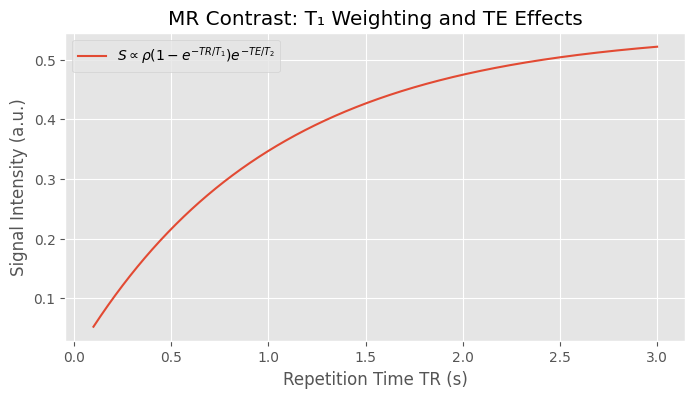

In [25]:
def mr_contrast():
    TR = np.linspace(0.1, 3, 1000)
    T1 = 1.0
    TE = 0.03
    T2 = 0.05
    rho = 1.0
    S = rho * (1 - np.exp(-TR / T1)) * np.exp(-TE / T2)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(TR, S, label=r'$S\propto\rho(1-e^{-TR/T_1})e^{-TE/T_2}$')
    ax.set_xlabel("Repetition Time TR (s)")
    ax.set_ylabel("Signal Intensity (a.u.)")
    ax.set_title("MR Contrast: T₁ Weighting and TE Effects")
    plt.legend()
    plt.show()

mr_contrast()

## 16. Magnetization and Polarization

The thermal polarization (P) of nuclear spins is given by:

![Polarization Equation](https://latex.codecogs.com/svg.image?P=\tanh\left(\frac{\gamma\hbarB_0}{2kT}\right))

At room temperature, the polarization is very small. Below we compute P for typical conditions.

In [26]:
def magnetization_polarization():
    gamma = 2 * np.pi * 42.58e6  # rad/s/T for protons
    B0 = 1.5  # Tesla
    hbar = 1.0545718e-34
    k = 1.380649e-23
    T = 300  # Kelvin
    P = np.tanh(gamma * hbar * B0 / (2 * k * T))
    
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(["Polarization"], [P], color='green')
    ax.set_ylim(0, 1)
    ax.set_ylabel("Polarization (P)")
    ax.set_title(r"Magnetization & Polarization: $P=\tanh(\frac{\gamma\hbarB_0}{2kT})$")
    plt.show()

magnetization_polarization()

ValueError: 
P=\tanh(\frac{\gamma\hbarB_0}{2kT})
                    ^
ParseSyntaxException: Unknown symbol: \hbarB, found '\'  (at char 20), (line:1, col:21)

<Figure size 600x400 with 1 Axes>

## 17. Putting It All Together

The functions above demonstrate many of the core physical equations and phenomena of NMR. In the remainder of the notebook you can call these functions one by one (or in sequence) to explore the concepts interactively.

For example, run all cells (or the `main()` cell below) to step through:

1. NMR introduction
2. Inside the scanner overview
3. Proton precession and Larmor frequency
4. Signal detection
5. Flip angle effects
6. Ensemble magnetization
7. FID simulation (T₂ decay)
8. T₂ weighting via TE
9. Spin density imaging simulation
10. T₁ relaxation recovery
11. T₁ weighting and effect of TR
12. Rotating frame concept
13. B₁ field excitation
14. Inversion recovery for T₁ measurement
15. MR contrast combining T₁ and T₂ effects
16. Thermal polarization calculation

You can also modify parameters (such as T₁, T₂, B₀, flip angles, etc.) to see how the plots change and gain a deeper understanding of the underlying physics.

In [27]:
def main():
    nmr_intro()
    inside_mri_scanner()
    proton_precession()
    signal_detection_larmor()
    flip_angle()
    ensemble_magnetic_moment()
    free_induction_decay()
    weighting_and_TE()
    spin_density_imaging()
    t1_relaxation()
    t1_weighting_and_TR()
    rotating_frame()
    b1_excitation()
    measuring_longitudinal_magnetization()
    mr_contrast()
    magnetization_polarization()

# Uncomment the following line to run all demonstrations in sequence
# main()

### How to Use This Notebook

You can run each code cell individually to see the plot and accompanying text. Alternatively, if you want to see all the demonstrations one after the other, uncomment the call to `main()` in the last code cell and run it.

This interactive approach should help you understand the key NMR physics equations and how they are used to model and visualize experiments. Later, similar ideas can be extended to explore MRI physics.